# Decision Tree

In [1]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.metrics import root_mean_squared_error
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt
import numpy as np
import graphviz

In [2]:
import sys
sys.path.append('F:\\Users\\Manuel García Plaza\\Desktop\\TFG\\')

In [3]:
from notebooks.utils.regression_metrics import regression

In [4]:
train =  pd.read_parquet('../../../data/model_input/train_sets/superconductivity.parquet')
validation =  pd.read_parquet('../../../data/model_input/validation_sets/superconductivity.parquet')

In [5]:
y_train = train.critical_temp
X_train = train.drop(columns=['critical_temp'])

In [6]:
y_validation = validation.critical_temp
X_validation = validation.drop(columns=['critical_temp'])

In [7]:
exploratory_depths = [1, 5, 10, 15, 20, 25, 30, 40, 50, 60]

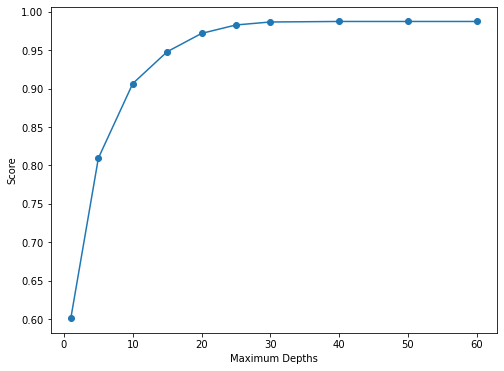

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(exploratory_depths, [DecisionTreeRegressor(max_depth=i).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], marker= 'o')
plt.xlabel('Maximum Depths')
plt.ylabel('Score')
plt.show()

We won't exceed maximum depth = 30

In [9]:
max_depth = [1, 3, 5, 7, 10, 12, 15, 17, 20, 22, 25, 30]

In [10]:
models_list = [DecisionTreeRegressor(max_depth = i) for i in max_depth]
names_list = ['DT_'+str(i) for i in max_depth]

In [11]:
metrics = regression(models_list, names_list, '../../../data/metrics/superconductivity/decision_tree.csv', X_train, y_train, X_validation, y_validation, metrics={})
metrics

,Run_Time,Train_RMSE,Validation_RMSE,delta%
DT_1,0.215992,21.605459,21.936537,1.532382
DT_3,0.488400,17.144601,17.557403,2.407769
DT_5,0.702121,14.938246,16.010816,7.180030
DT_7,0.987120,12.823564,13.945602,8.749818
DT_10,1.255663,10.463573,13.028826,24.516032
DT_12,1.495460,9.219329,12.761231,38.418230
DT_15,1.467701,7.810900,12.497117,59.995860
DT_17,1.590571,6.975428,12.375156,77.410688
DT_20,1.796367,5.752027,12.416288,115.859351
DT_22,1.904610,5.225458,12.398195,137.265222


We are left with **DT_7** because it gets the lowest RMSE in validation among the models with acceptable delta.

In [12]:
test =  pd.read_parquet('../../../data/model_input/test_sets/superconductivity.parquet')

In [13]:
y_test = test.critical_temp
X_test = test.drop(columns=['critical_temp'])

In [14]:
retrain = pd.concat([train, validation])

In [15]:
y_retrain = retrain.critical_temp
X_retrain = retrain.drop(columns=['critical_temp'])

In [16]:
model = DecisionTreeRegressor(max_depth=7).fit(X_retrain, y_retrain)

In [22]:
test_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, test_pred)
print('Test AUC:', round(auc, 4))

Test AUC: 14.3917


We get similar results 

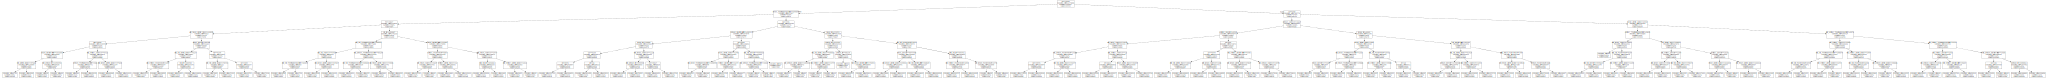

In [19]:
finaltree = export_graphviz(model, out_file=None, 
                                feature_names=X_retrain.columns,
                                proportion=True)

finalgraph = graphviz.Source(finaltree, format="pdf")
finalgraph.render(filename='best_decision_tree')
finalgraph

In [20]:
dump(model, 'best_decision_tree.joblib')

['best_decision_tree.joblib']

In [23]:
with open('../../../data/metrics/superconductivity/final_RMSE.txt', 'a') as f:
    f.write('\nDT, '+ str(rmse))

C:\Users\MANUEL~2\AppData\Local\Temp/ipykernel_9412/3731660872.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_retrain.min(), y_retrain.max()], [y_retrain.min(), y_retrain.max()],


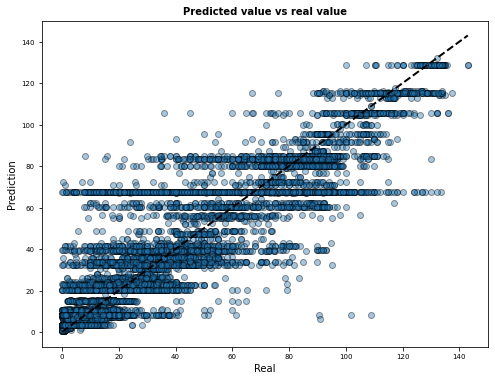

In [27]:
prediction_retrain = model.predict(X_retrain)
error_retrain   = prediction_retrain - y_retrain

plt.figure(figsize=(8, 6))

plt.scatter(y_retrain, prediction_retrain, edgecolors=(0, 0, 0), alpha = 0.4)
plt.plot([y_retrain.min(), y_retrain.max()], [y_retrain.min(), y_retrain.max()],
                'k--', color = 'black', lw=2)
plt.title('Predicted value vs real value', fontsize = 10, fontweight = "bold")
plt.xlabel('Real')
plt.ylabel('Prediction')
plt.tick_params(labelsize = 7)